In [146]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats                      
from iminuit import Minuit
from iminuit.cost import LeastSquares
from itertools import accumulate

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd

In [147]:
t1 = np.load('times_HLA.npy')
t2_initial = np.load('times_DAZ.npy')
times3_initial = np.load('times_LWN.npy')
times4_initial = np.load('times_PVX.npy')

t2 = [sum(t2_initial[i:i+2]) for i in range(0, len(t2_initial) ,2 )]
t3 = [sum(times3_initial[i:i+3]) for i in range(0, len(times3_initial), 3)]
t4 = [sum(times4_initial[i:i+3]) for i in range(0, len(times4_initial), 3)]
del t2[-1]
del t3[-1]
del t4[-1]

t1a = np.cumsum(t1)
t2a = np.cumsum(t2)
t3a = np.cumsum(t3)
t4a = np.cumsum(t4)

In [148]:
save_plots = False
Minuit.print_level = 0

#Uncertaintees
a = 9.3
b = 0
sigmay = 0.2

array_a = np.zeros(1)
array_b = np.zeros(1)
array_Chi2 = np.zeros(1)
array_Prob = np.zeros(1)

for iexp in range(1) : 
    x = np.arange(len(t2a))+1
    y = np.array(t2a) 
    sy = sigmay*np.ones_like(x)

    def fit_func(x, a, b): 
        return a*x + b
    
    chi2 = LeastSquares(x,y,sy,fit_func)
    
    def chi2_func(a,b):
        return np.sum(((y - fit_func(x,a,b)) / sy)**2)
    
    mfit = Minuit(chi2_func,a=a,b=b)

    mfit.migrad();
    
    a_fit = mfit.values['a']
    b_fit = mfit.values['b']
    sigma_a_fit = mfit.errors['a']
    sigma_b_fit = mfit.errors['b']
    
    Nvar = 2                     
    Ndof_fit = len(t2a) - Nvar
    
    Chi2_fit = mfit.fval                            
    Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)
    
    
    array_a[iexp] = a_fit
    array_b[iexp] = b_fit
    array_Chi2[iexp] = Chi2_fit
    array_Prob[iexp] = Prob_fit
    
    
    print(f"  Fit: a={a_fit:6.3f}+-{sigma_a_fit:5.3f}  b={b_fit:5.3f}+-{sigma_b_fit:5.3f}  p={Prob_fit:6.4f}")
    


  Fit: a= 9.397+-0.003  b=-0.033+-0.066  p=1.0000


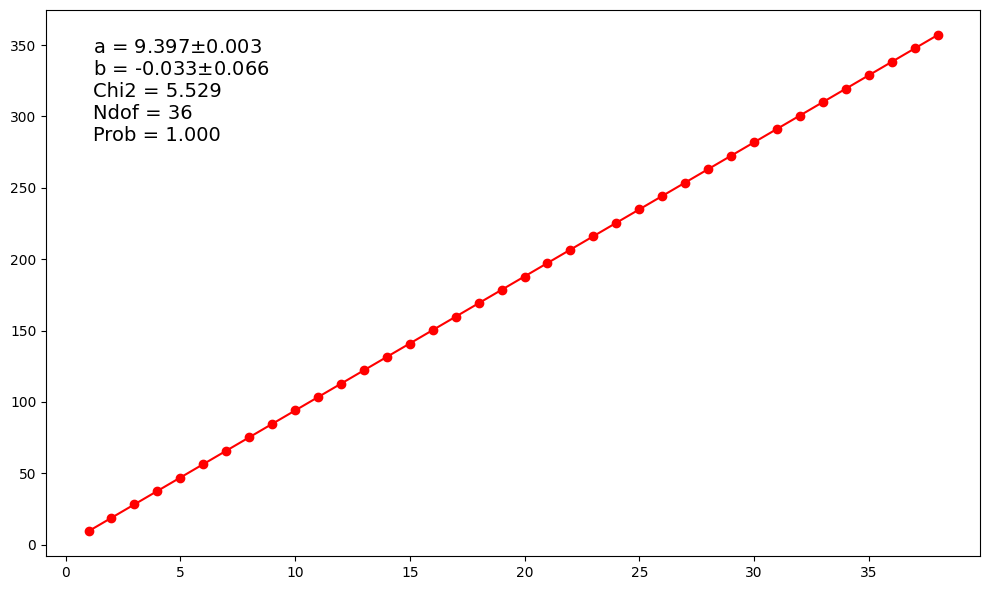

In [149]:
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(x, y, sy, fmt='ro', ecolor='k', elinewidth=2, capsize=2, capthick=1)
ax.plot(x, fit_func(x, *mfit.values[:]), '-r')      # Note how we can "smartly" input the fit values!
plt.close()

fit_info = [f'a = {a_fit:5.3f}' + r'$\pm$' +  f"{sigma_a_fit:5.3f}",
            f'b = {b_fit:5.3f}' + r'$\pm$' + f"{sigma_b_fit:5.3f}",
            f'Chi2 = {Chi2_fit:5.3f}',
            f'Ndof = {Ndof_fit:d}',
            f'Prob = {Prob_fit:5.3f}',
]
ax.text(0.05, 0.76, "\n".join(fit_info), fontsize=14, transform = ax.transAxes)
fig.tight_layout()
if (save_plots) :
    fig.savefig("FitToLine.pdf")
fig

[[-0.5         2.65985642]
 [-0.4998      2.81484695]
 [-0.4996      2.81450631]
 ...
 [ 3.6612      2.80701226]
 [ 3.6614      2.8073529 ]
 [ 3.6616      2.80701226]]


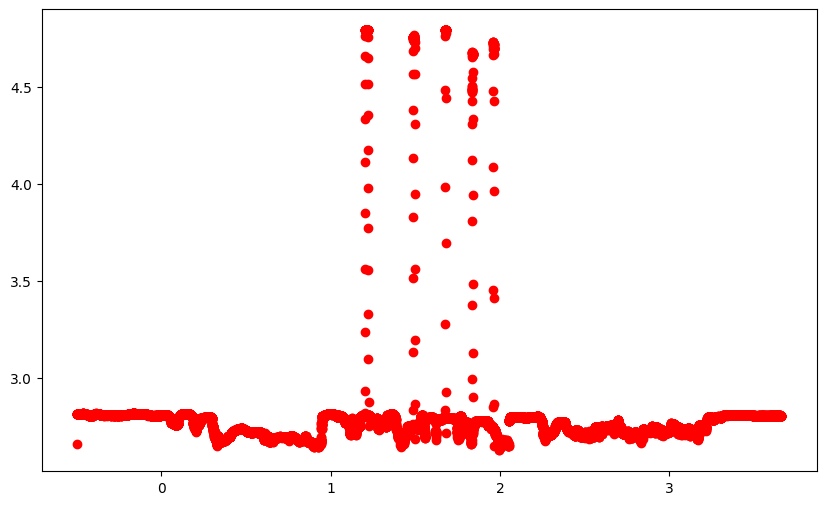

In [ ]:
import glob as gb

files = gb.glob('måling_ude_på_et_skråplan/*.csv')


data = np.genfromtxt('måling_ude_på_et_skråplan/data_side_1_ball_peter.csv', delimiter=',', skip_header=15, usecols=(0,1))
print(data)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data[:,0], data[:,1], 'ro')

In [151]:
data_peaks = data[data[:,1] > 4.5]

time_start = data_peaks[(np.abs(np.roll(data_peaks,1,axis=0)-data_peaks)[:,0]) > 0.01][:,0]
time_stop =data_peaks[(np.abs(np.roll(data_peaks,-1,axis=0)-data_peaks)[:,0]) > 0.01][:,0]

t  =  time_start + (time_stop - time_start)/2
print(t)




[1.212  1.49   1.6783 1.8364 1.9617]


In [152]:
sensor_afstand_1 = np.array([18.6,36.4,54.5,73.6,91.2]) / 100
sensor_afstand_2 = np.array([18.7,36.3,54.6,73.5,91.2]) / 100
sensor_afstand_3 = np.array([18.7,36.4,54.6,73.55,91.65]) / 100
sensor_afstand_4 = np.array([18.4,36.4,54.5,73.5,91.2]) / 100
samlet_afstand = (sensor_afstand_1 + sensor_afstand_2 + sensor_afstand_3 + sensor_afstand_4) / 4 

d_r_inder = 0.006 
bold_1 = 0.01
bold_2 = 0.0125
vinkel_v = (76.1 + 76.5 + 76.1 + 76.2) / 4
vinkel_h = (76 + 76.3 + 75.95 + 75.9) / 4 
vinkel_v1 = (76.4 + 76.5 + 76.2 + 76.3) / 4
vinkel_h1 = (75.9 + 76.5 + 76 + 76) / 4
samlet_vinkel = (vinkel_v + vinkel_h + vinkel_v1 + vinkel_h1) / 4


In [153]:
a, b, c = 9.82, 0, 0
sigmay = 0.2

array_c = np.zeros(1)
array_d = np.zeros(1)
array_Chi2 = np.zeros(1)
array_Prob = np.zeros(1)

for iexp in range(1) : 
    #x = np.arange(len(t))+1
    x = np.array(t)
    #y = np.array(t)
    y = np.array(samlet_afstand)
    sy = sigmay*np.ones_like(x)

    def fit_func(x, a, b, c): 
        return (1/2)*a*x**2 + b*x + c 
    
    chi2 = LeastSquares(x,y,sy,fit_func)
    
    def chi2_func( a, b, c):
        return np.sum(((y - fit_func(x, a, b, c)) / sy)**2)
    
    mfit = Minuit(chi2_func,a=a,b=b, c=c)

    mfit.migrad();
    
    a_fit = mfit.values['a']
    b_fit = mfit.values['b']
    c_fit = mfit.values['c']
    sigma_c_fit = mfit.errors['c']
    sigma_a_fit = mfit.errors['a']
    sigma_b_fit = mfit.errors['b']
    
    Nvar = 2                   
    Ndof_fit = len(t) - Nvar
    
    Chi2_fit = mfit.fval                            
    Prob_fit = stats.chi2.sf(Chi2_fit, Ndof_fit)
    
    
    array_a[iexp] = a_fit
    array_b[iexp] = b_fit
    array_c[iexp] = c_fit
    array_Chi2[iexp] = Chi2_fit
    array_Prob[iexp] = Prob_fit
    

    print(f"fit: a={a_fit:6.3f}+-{sigma_a_fit:5.3f}  b={b_fit:5.3f}+-{sigma_b_fit:5.3f}  p={Prob_fit:6.4f}")
    


fit: a= 1.404+-3.029  b=-1.259+-4.809  p=1.0000


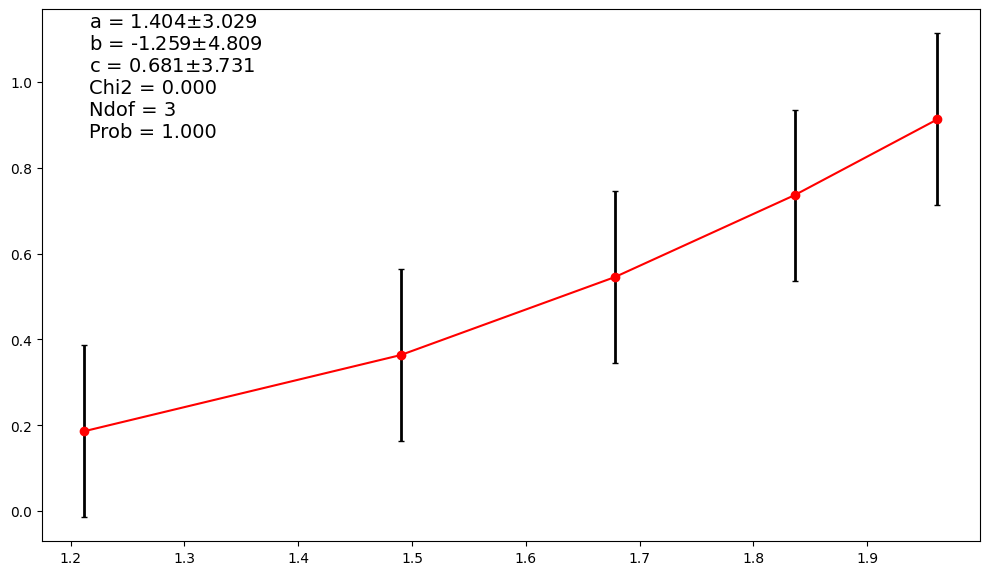

In [154]:
fig, ax = plt.subplots(figsize=(10,6))
ax.errorbar(x, y, sy, fmt='ro', ecolor='k', elinewidth=2, capsize=2, capthick=1)
ax.plot(x, fit_func(x, *mfit.values[:]), '-r')      
plt.close()

#ax.invert_xaxis()
#ax.invert_yaxis()

fit_info = [f'a = {a_fit:5.3f}' + r'$\pm$' +  f"{sigma_a_fit:5.3f}",
            f'b = {b_fit:5.3f}' + r'$\pm$' + f"{sigma_b_fit:5.3f}",
            f'c = {c_fit:5.3f}' + r'$\pm$' + f"{sigma_c_fit:5.3f}",
            f'Chi2 = {Chi2_fit:5.3f}',
            f'Ndof = {Ndof_fit:d}',
            f'Prob = {Prob_fit:5.3f}',
]

ax.text(0.05, 0.76, "\n".join(fit_info), fontsize=14, transform = ax.transAxes)
fig.tight_layout()
if (save_plots) :
    fig.savefig("FitToLine.pdf")
fig

In [155]:
a_1 = a_fit 
theta = np.deg2rad(180-samlet_vinkel-90)
g = (a_1 / np.sin(theta)) * (1+(2/5)*(bold_1**2) / (bold_1**2 - d_r_inder**2))
print(g)



9.54967859385266
